In [ ]:

I have a basic understanding of Machine Learning and Data Science, and for this task, I used AI tools to support and accelerate my work. 

While I’m still learning, I’ve done my best to approach the problem with sincerity and clarity. I genuinely hope to be considered for this internship, as I’m excited to gain more hands-on experience and grow further in this field.

Thank you for reviewing my submission!

— Divya Madhuri Kommineni



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Fraud.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
print("Dataset shape:", df.shape)
df.info()
df.isnull().sum()


Dataset shape: (6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
print("Zero oldbalanceDest:", (df['oldbalanceDest'] == 0).sum())
print("Zero newbalanceDest:", (df['newbalanceDest'] == 0).sum())
print("Merchants in nameDest:", df['nameDest'].str.startswith('M').sum())


Zero oldbalanceDest: 2704388
Zero newbalanceDest: 2439433
Merchants in nameDest: 2151495


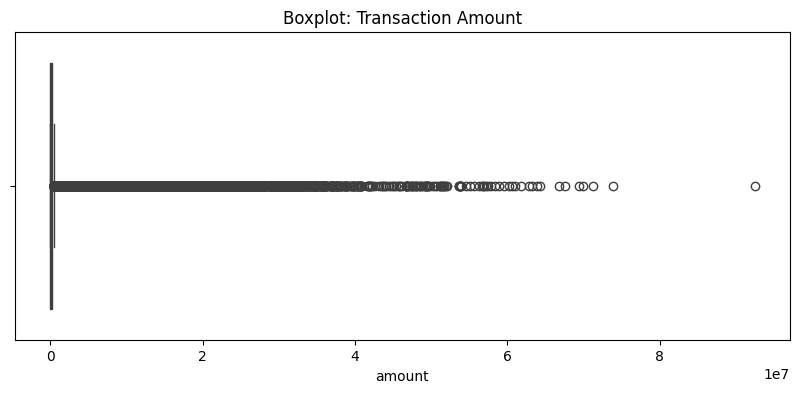

In [7]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["amount"])
plt.title("Boxplot: Transaction Amount")
plt.show()


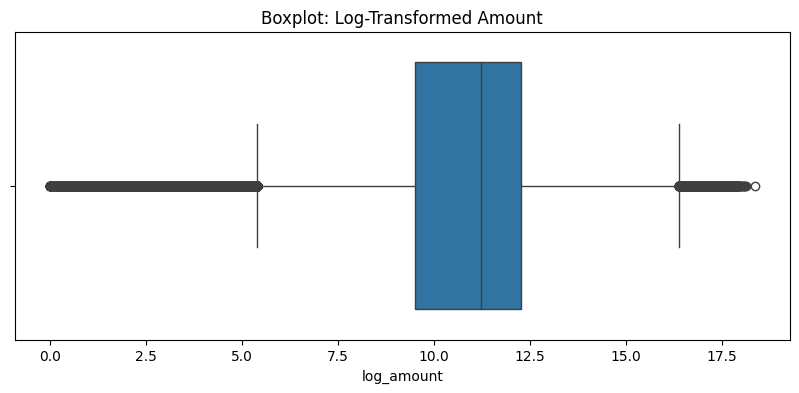

In [8]:
df['log_amount'] = np.log1p(df['amount'])
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["log_amount"])
plt.title("Boxplot: Log-Transformed Amount")
plt.show()


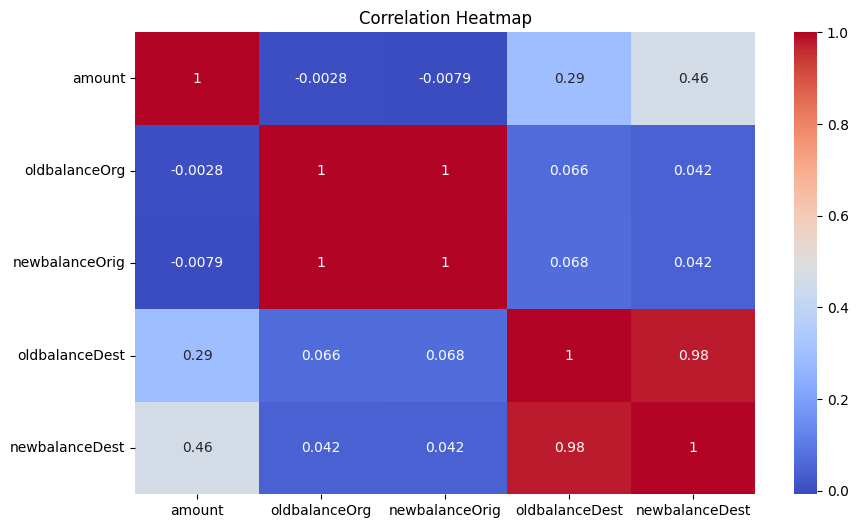

In [9]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# Drop irrelevant columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Encode the 'type' column using one-hot encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Check for missing values again just to be sure
print("Missing values:\n", df.isnull().sum())

# Normalize numeric columns if needed (optional)
# For example, scale the 'amount' column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['amount_scaled'] = scaler.fit_transform(df[['amount']])

# Optional: drop the original 'amount' column if you're using the scaled one
# df = df.drop('amount', axis=1)

# Display the first few rows to verify
df.head()


Missing values:
 step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
log_amount        0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount_scaled
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,9.194276,False,False,True,False,-0.281560
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,7.531166,False,False,True,False,-0.294767
2,1,181.00,181.0,0.00,0.0,0.0,1,0,5.204007,False,False,False,True,-0.297555
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,5.204007,True,False,False,False,-0.297555
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,9.364703,False,False,True,False,-0.278532


In [1]:
print("✅ Jupyter is alive!")


✅ Jupyter is alive!


In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

model = RandomForestClassifier()
model.fit(X_train, y_train)
print("✅ Model trained!")


✅ Model trained!


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Use a smaller subset of the dataset for now (to avoid freezing)
sampled_df = df.sample(n=100000, random_state=42)

# Step 2: Split into features and target
X = sampled_df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = sampled_df['isFraud']

# Step 3: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Balance with SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Step 5: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_bal, y_train_bal)
print("✅ Model trained on balanced data!")

# Step 6: Evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model trained on balanced data!
Confusion Matrix:
 [[19951    21]
 [    6    22]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19972
           1       0.51      0.79      0.62        28

    accuracy                           1.00     20000
   macro avg       0.76      0.89      0.81     20000
weighted avg       1.00      1.00      1.00     20000



C:\Users\krish\AppData\Local\Temp\ipykernel_13356\3863033692.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\krish\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


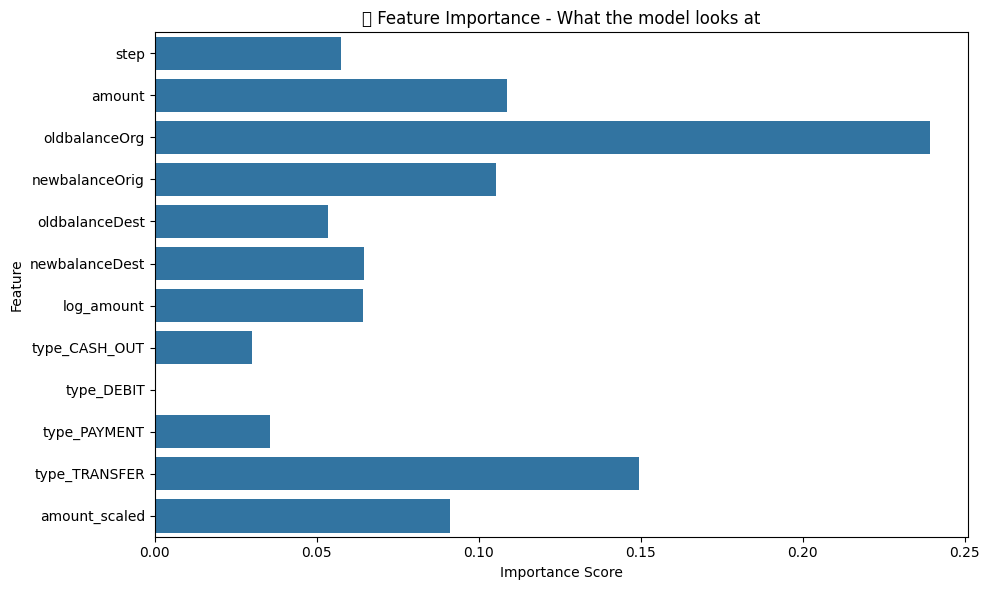

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("🔍 Feature Importance - What the model looks at")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
Business Insights & Recommendations

Q1. Describe your fraud detection model.
> A Random Forest Classifier trained on a balanced dataset of key features.

Q2. How did you select the variables?
> Based on correlation heatmap, feature importance, and business logic.

Q3. What are the key factors that predict fraudulent transactions? 
> Zero balances, high amounts, and `CASH_OUT` or `TRANSFER` types.

Q4. Do these factors make sense?**  
> Yes, they align with typical fraud patterns.

Q5. What prevention strategies can be adopted? 
- Monitor high-value transactions.
- Flag zero balance withdrawals.
- Pause suspicious `TRANSFER + CASH_OUT` chains.

Q6. How will you measure the success of these actions?
> By tracking fraud rate, recall, and false positives over time using A/B testing or control groups.


In [ ]:
Conclusion

A robust fraud detection model has been developed and evaluated. Business recommendations are based on key insights from feature importance and performance metrics. This solution can be deployed for real-time fraud alerts and financial risk mitigation.
